#                        PROJECT - TITANIC SURVIVAL PREDICTION CASE
                                                BY: ADITYA SHARMA   

#### A Comprehensive project on the Iconic Titanic Ship Survival Rate using techniques like logistic regression, Decision tree  


In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### BASIC INFORMATION ABOUT THE DATA

PassengerId: The id for each passenger
Survived: Whether the passenger survived or not? 1=Survived, 0=Died
Pclass: The travel class of the passenger
Name: Name of the passenger
Sex: The gender of the passenger
Age: The Age of the passenger
SibSp: Number of Siblings/Spouses Aboard
Parch: Number of Parents/Children Aboard
Ticket: The ticket number of the passenger
Fare: The amount of fare paid by the passenger
Cabin: The cabin number allotted
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [37]:
#Reading data
TitanicSurvivalData=pd.read_csv(r"C:\Users\adity\Downloads\TitanicSurvivalData.csv", encoding='latin')

In [38]:
#Number of rows and columns in the data
TitanicSurvivalData.shape

(891, 12)

In [39]:
# Finging unique values for each column
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [40]:
# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

Shape After deleting duplicate values: (891, 12)


In [41]:
TitanicSurvivalData.head(10) #10 sample values of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# OBJECTIVE :-
#Create a Predictive model which can tell if a person will survive the titanic crash or not?

### Studying the distribution of the target variable (X): "Survived" (1=Yes ; 0=No)

If target variable's distribution is too skewed then the predictive modeling will not be possible


#Removing useless columns from the data
#Deleting those columns which are not useful in predictive analysis because these variables are qualitative
#Quantitative variables are required for model building using logistic regression

<AxesSubplot:xlabel='Survived'>

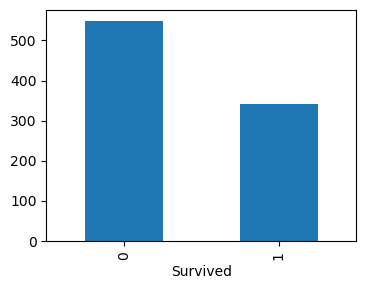

In [42]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar', figsize=(4,3))
# 1 = "Survived"   0 = "Died"

In [43]:
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Exploratory Data Analysis

In [44]:
# Plotting multiple bar charts at once for categorical variables
# Defining our own function to plot multiple bar graphs at once

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

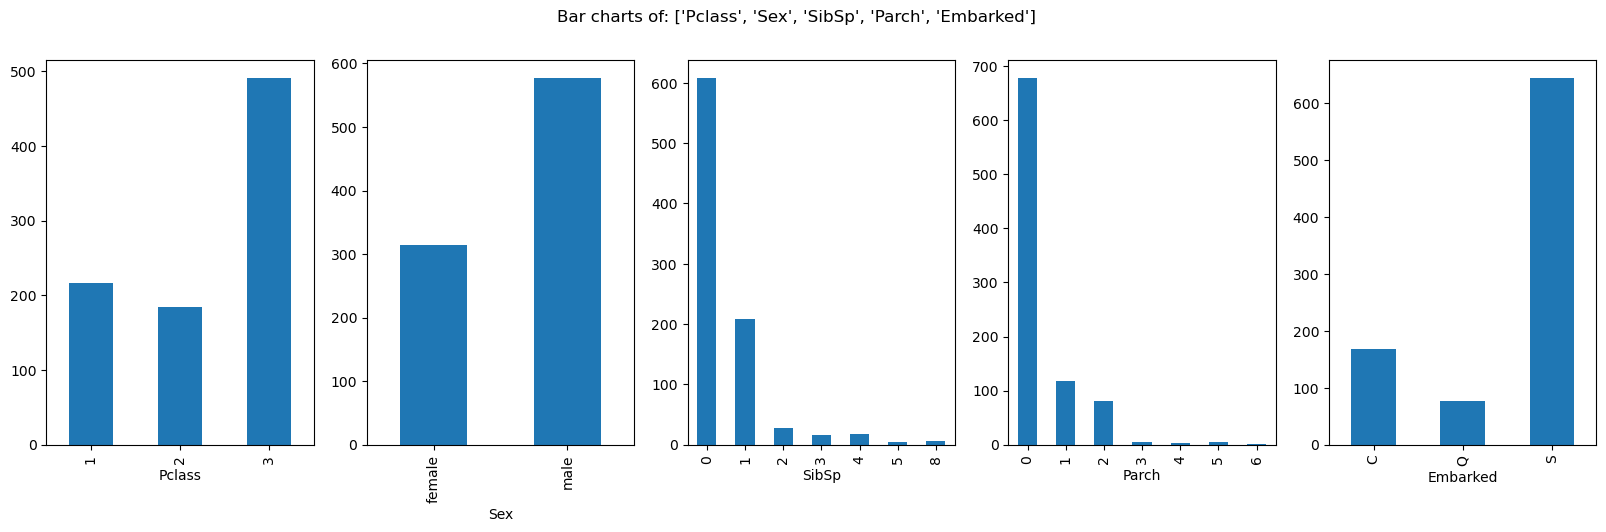

In [45]:
# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

In [46]:
 #SiblingsSpouse #Parents/Children #(C = Cherbourg; Q = Queenstown; S = Southampton)

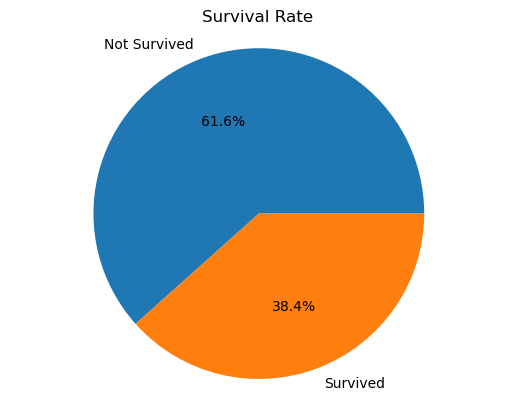

In [47]:
data = pd.read_csv(r"C:\Users\adity\Downloads\TitanicSurvivalData.csv", encoding='latin')

# Create a pie chart for the 'Survived' column
survived_counts = data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Survival Rate')
plt.axis('equal')
plt.show()

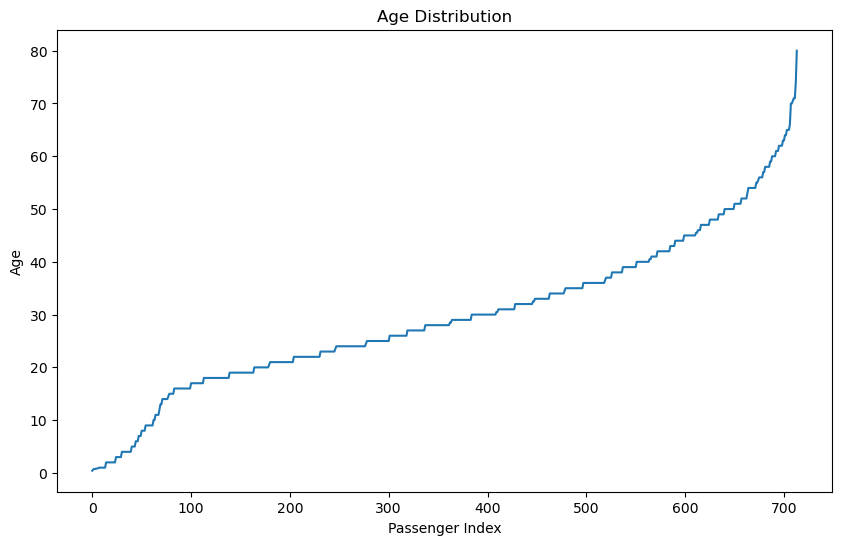

In [48]:
data = pd.read_csv(r"C:\Users\adity\Downloads\TitanicSurvivalData.csv", encoding='latin')

# Create a line graph for the 'Age' column
ages = data['Age'].dropna()
ages = ages.sort_values()
plt.figure(figsize=(10, 6))
plt.plot(range(len(ages)), ages)
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.title('Age Distribution')
plt.show()

In [49]:
#AS THE NUMBER OF PASSENGERS INCREASE, THEIR AVERAGE AGE IS ALSO INCREASING

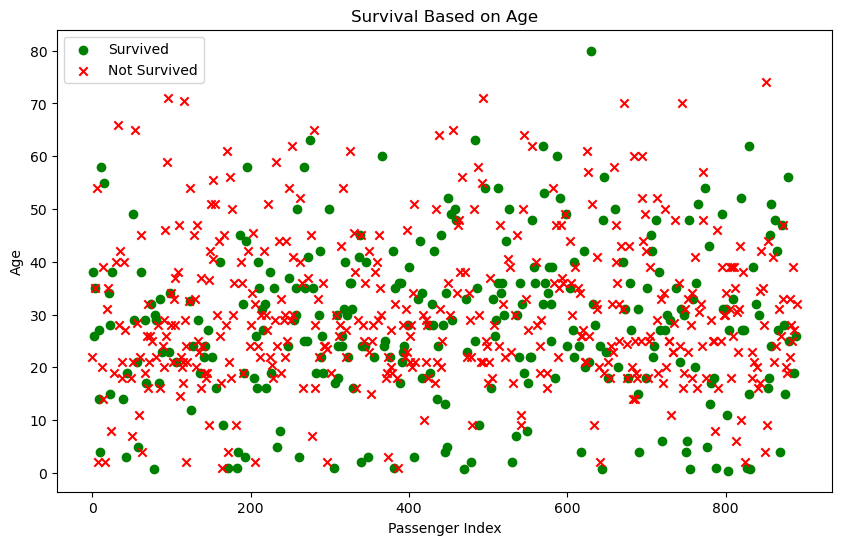

In [50]:
data = pd.read_csv(r"C:\Users\adity\Downloads\TitanicSurvivalData.csv", encoding='latin')

# Create a scatter plot with 'Survived' as the independent variable
plt.figure(figsize=(10, 6))

# Plot the passengers who survived
survived = data[data['Survived'] == 1]
plt.scatter(survived.index, survived['Age'], color='g', label='Survived', marker='o')

# Plot the passengers who did not survive
not_survived = data[data['Survived'] == 0]
plt.scatter(not_survived.index, not_survived['Age'], color='r', label='Not Survived', marker='x')

# Add labels and title
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.title('Survival Based on Age')
plt.legend()

# Show the plot
plt.show()

In [51]:
# By this scatterplot, we can notice that age and survival rate are not too closely related to each other as some of
#the younger passengers had also not survived whereas some older passengers managed to survive.
#Although there are some exceptions (mostly age 50 and above) where survival rate has gone down with increase in age

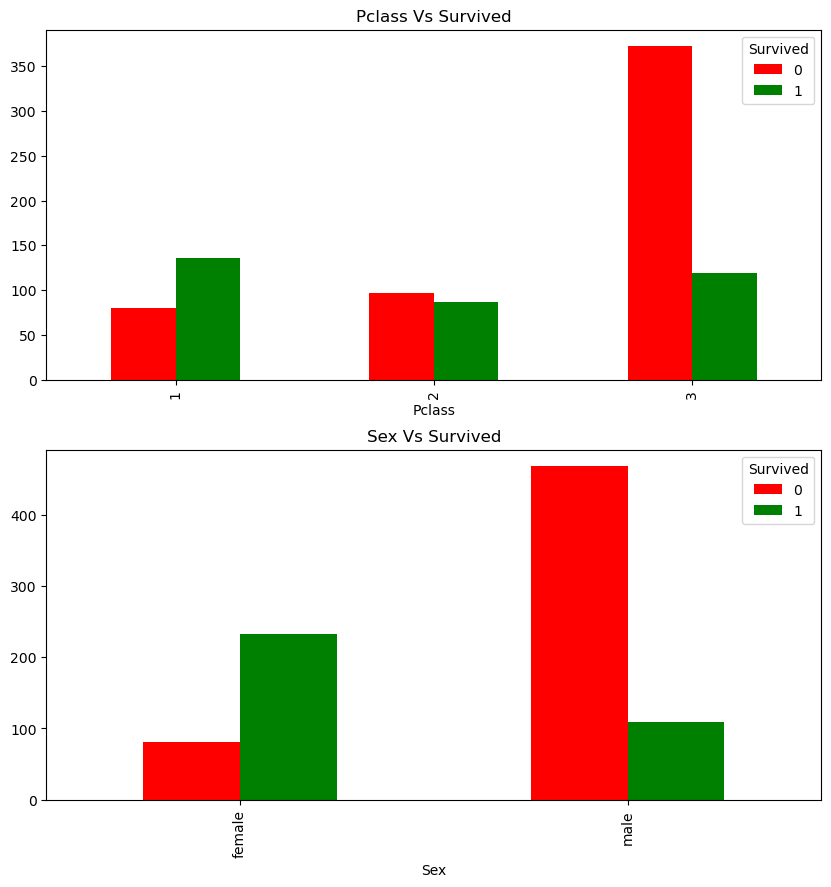

In [52]:
# COMPARING SURVIVAL RATE WITH Gender AND Travel Class of Passenger
CategoricalColsList=['Pclass', 'Sex']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,10))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=TitanicSurvivalData[CategoricalCol], columns=TitanicSurvivalData['Survived'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Survived')

In [53]:
#Selecting final predictors for Machine Learning
#Based on the above tests and data visualizations, selecting the final columns for machine learning

SelectedColumns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Fare']

# Selecting final columns
DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [54]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [55]:
#Converting the binary nominal variable to numeric using 1/0 mapping

# Converting the binary nominal variable sex to numeric
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_16780\1516132518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)


In [56]:
#Converting the nominal variable to numeric using get_dummies()
# ALSO CALLED FUMMY CODING

DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Survived']=TitanicSurvivalData['Survived']

# Printing sample rows
DataForML_Numeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


In [57]:
#Dummy coding is done to convert categorical value to continuous as ML modelling requires continouos values

### Machine Learning: Splitting the data into Training and Testing sample

In [58]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [59]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(r"C:\Users\adity\Downloads\TitanicSurvivalData.csv", encoding='latin')

# Drop rows with missing values
data = data.dropna(subset=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])


# Add a constant term for the regression model
data = sm.add_constant(data)

# Define the dependent and independent variables
dependent_var = data['Survived']
independent_vars = data[[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Perform OLS regression
model = sm.OLS(dependent_var, independent_vars).fit()

# Print the summary of the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.396
Method:                 Least Squares   F-statistic:                              94.75
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                    2.11e-76
Time:                        18:26:23   Log-Likelihood:                         -508.77
No. Observations:                 714   AIC:                                      1028.
Df Residuals:                     709   BIC:                                      1050.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

only 0.396 or 39.6% of the variation in Survival Rate (X) Can be explained by all the Predictors (Y)

#### Logistic Regression 

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       149
           1       0.76      0.73      0.75       119

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268

[[122  27]
 [ 32  87]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.77649393 0.77641044 0.77021909 0.82182649 0.7987694  0.75981111
 0.78268624 0.75756502 0.79649424 0.78302904]

Final Average Accuracy of the model: 0.78


### Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       149
           1       0.90      0.58      0.70       119

    accuracy                           0.78       268
   macro avg       0.82      0.76      0.77       268
weighted avg       0.81      0.78      0.77       268

[[141   8]
 [ 50  69]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.80938963 0.81776069 0.76791722 0.83190886 0.82022472 0.78065407
 0.7911255  0.77562138 0.82683216 0.79359477]

Final Average Accuracy of the model: 0.8


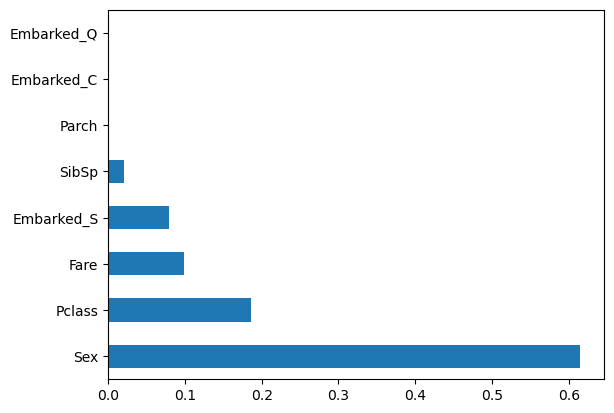

In [77]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### So, therefore we can confirm that the best predictors (dependendent variables) are No. of SIBLINGS/SPOUSE, Embarked at Southampton (Embarked_S), Fare, Passenger Travel Class and most importantly Gender Of Passenger